## AML-2203 Advanced Python AI and ML Tools 
<b>Assignment 1</b><br>
<b>Submitted by:</b> Jonatas Aguiar<br>
<b>Instructor:</b> Vahid Hadavi, PhD, P.Eng<br>
<b>Date:</b> 14-March-2021
<br><br>

## Hypothesis: University towns have their mean housing prices less effected by recessions. 

### I. Housing Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm

#### Step 1 - Load and understand the dataset

Data was extracted from the Zillow research data site for housing in the United States. In particular the datafile contains all homes at a city level with median home sale prices at a fine grained level.

In [2]:
# load the dataset
df = pd.read_csv('http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv')

In [3]:
df.head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,196258.0,195693.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Columns: 299 entries, RegionID to 2020-03-31
dtypes: float64(291), int64(2), object(6)
memory usage: 62.3+ MB


'RegionName' column has repeated names which may cause err when analyzing the data. A new column named 'region_name_state', which has a value of concatenated 'RegionName' with '_State' suffix, was created. That guarantees the uniqueness of each city in the dataset  and a better analyzis.

In [5]:
# Get the unique cities in 'RegionName' column
print(len(df['RegionName'].unique()))

17616


In [6]:
# Concatenating city and state
df['region_name_state'] = df['RegionName'] +'_'+ df['State']
df['region_name_state'].head()

0       New York_NY
1    Los Angeles_CA
2        Houston_TX
3        Chicago_IL
4    San Antonio_TX
Name: region_name_state, dtype: object

In [7]:
# Count the unique cities in "RegionName" and in 'region_name_state'
print('RegionName: ', len(df['RegionName'].unique()))
print('region_name_state: ', len(df['region_name_state'].unique()))

RegionName:  17616
region_name_state:  27000


RegionName and region_name_state have different unique values because there are regions having the same name but located in different state.

New dataframe named 'df_by_city' was created with the following features:
1. transposed region_name_state as headers 
2. transposed value of median home sale prices as of ['date']
2. additional Year and Month columns based from parsed date column.

In [8]:
# Take the dates, put them into a dataframe and add it 
# into a list 'df_to_concat_list'
df_to_concat_list = [] 
dates = df.columns[8:-1].values # take dates
dates = pd.DataFrame(dates, columns=['date']) # create DF
df_to_concat_list.append(dates) # add the dataframe as the first intem in the 'df_to_concat_list'


# For each city in the column 'region_name_state', take the its home sale prices,
# put them into a DataFrame, and add the DataFrame into the 'df_to_concat_list' list 
for index in tqdm(range(df.shape[0])):
    city_name = df.iloc[index,-1] # get city name
    df_to_concat = df.iloc[index,8:-1].T.copy().values # get home value price
    df_to_concat = pd.DataFrame(df_to_concat, columns=[city_name]) # create DF
    df_to_concat_list.append(df_to_concat) # add to the df_to_concat_list list

In [12]:
# 'df_to_concat_list' list has dates dataframe as it first item.
# The remaining items are the home sale prices of each city.
# Concatenating all dataframes of that list creating a dataframe
# describing home price sales by city
df_by_city = pd.concat(df_to_concat_list, axis=1)
df_by_city.head(2)

,date,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
0,1996-01-31,196258,185649,93518,130920,94041,70764,98258,148835,194249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-02-29,195693,185625,93633,130772,94007,70673,98556,148713,193854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Creating columns 'year' and 'month' to the end of the dataframe
# to facilitate queries
df_by_city['year'] = df_by_city['date'].apply(lambda x: int(x[:4]))
df_by_city['month'] = df_by_city['date'].apply(lambda x: x[5:7])
df_by_city.head(2)

,date,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,...,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA,year,month
0,1996-01-31,196258,185649,93518,130920,94041,70764,98258,148835,194249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996,01
1,1996-02-29,195693,185625,93633,130772,94007,70673,98556,148713,193854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996,02


#### Step 2 - Handle missing values

In [14]:
# check for null values
df_by_city.isna().sum()

date                0
New York_NY         0
Los Angeles_CA      0
Houston_TX          0
Chicago_IL          0
                 ... 
Dean_TX           132
Pulaski_GA        168
New Paris_PA      216
year                0
month               0
Length: 27333, dtype: int64

In [15]:
# Count of the missing values in df_by_city dataframe
df_by_city.isna().sum().sum()

2045374

In [16]:
df_by_city.iloc[:,1:27331].head()

,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,Dallas_TX,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
0,196258,185649,93518,130920,94041,70764,98258,148835,194249,101339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,195693,185625,93633,130772,94007,70673,98556,148713,193854,101335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,195383,185645,93636,130511,93973,70592,98876,148809,193590,101526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,194836,185706,93811,130495,93957,70445,99501,148805,193063,101895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,194652,185755,93966,130172,93895,70333,100096,148966,192736,102282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Impute the missing values from the entire dataset except date, year, month

# importing the KNN from fancyimpute library 
from fancyimpute import KNN 

# imputing the missing value with knn imputer 
knn_imputer = KNN()
data = df_by_city.iloc[:,1:27331] # excluding 3 date columns
impute_df_by_city = knn_imputer.fit_transform(data)

df_by_city_filled = pd.DataFrame(data = impute_df_by_city, columns = data.columns, index = data.index)

Imputing row 1/291 with 16713 missing, elapsed time: 47.975
Imputing row 101/291 with 11809 missing, elapsed time: 81.678
Imputing row 201/291 with 2546 missing, elapsed time: 93.007


Imputing data using fancyimpute converts the dataframe to np.array. Hence, pandas was used to convert the data back to dataframe and to retain the column names. 

In [18]:
df_by_city_filled.head()

,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,Dallas_TX,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
0,196258.0,185649.0,93518.0,130920.0,94041.0,70764.0,98258.0,148835.0,194249.0,101339.0,...,43436.868748,60152.135973,86229.941435,36848.681984,81218.150104,71181.732889,64409.422367,120020.218893,61238.682968,68212.935392
1,195693.0,185625.0,93633.0,130772.0,94007.0,70673.0,98556.0,148713.0,193854.0,101335.0,...,43436.861578,60152.237024,86230.061771,36848.703263,81218.209245,71181.863589,64409.407741,120020.172485,61238.755836,68212.900395
2,195383.0,185645.0,93636.0,130511.0,93973.0,70592.0,98876.0,148809.0,193590.0,101526.0,...,43436.862797,60152.402455,86230.057404,36848.703622,81218.211614,71181.877715,64409.409179,120020.173258,61238.764961,68212.901656
3,194836.0,185706.0,93811.0,130495.0,93957.0,70445.0,99501.0,148805.0,193063.0,101895.0,...,43436.871294,60152.636807,86230.136442,36848.821960,81218.260143,71181.740932,64409.414259,120020.234413,61238.699527,68212.600224
4,194652.0,185755.0,93966.0,130172.0,93895.0,70333.0,100096.0,148966.0,192736.0,102282.0,...,43408.924917,60153.026917,86230.326716,36848.867557,81218.396906,72106.255500,64301.538162,119907.408775,61532.701045,68212.345883


In [19]:
# Count of the missing values before and after imputation
print("Count of missing values before imputation: ", df_by_city.isna().sum().sum())
print("Count of missing values after imputation: ", df_by_city_filled.isna().sum().sum())

Count of missing values before imputation:  2045374
Count of missing values after imputation:  0


In [20]:
# Convert values to int
df_by_city_filled = df_by_city_filled.astype(int)

In [21]:
# Add the Date columns to the filled dataset
df1 = df_by_city[['date', 'year', 'month']]
df2 = df_by_city_filled

df_complete = pd.concat([df2, df1], axis = 1)

In [22]:
df_complete.head(2)

,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,Dallas_TX,...,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA,date,year,month
0,196258,185649,93518,130920,94041,70764,98258,148835,194249,101339,...,36848,81218,71181,64409,120020,61238,68212,1996-01-31,1996,01
1,195693,185625,93633,130772,94007,70673,98556,148713,193854,101335,...,36848,81218,71181,64409,120020,61238,68212,1996-02-29,1996,02


In [23]:
# Update df_by_city with complete columns
df_by_city = df_complete

#### Step 3 - Visualize

Plotting visualizations helps see the data consistency.

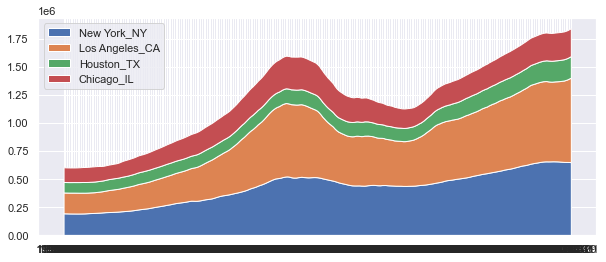

In [25]:
# For this plotting, we take home price sales from New York,Los Angeles, 
# Houston, and Chicago since 1996. It's interesting seing that they 
# present closes curve shape demonstrating the data consistency.
fig = plt.figure(figsize=(10,4))

# set seaborn style
sns.set_theme()
 
# Dates are in X axis and home values on Y axis
x = list(df_by_city['date'])
y = [list(df_by_city['New York_NY']), list(df_by_city['Los Angeles_CA']), 
     list(df_by_city['Houston_TX']), list(df_by_city['Chicago_IL'])]
 
# Plot
plt.stackplot(x, y, labels=['New York_NY', 'Los Angeles_CA', 'Houston_TX', 'Chicago_IL'])
plt.legend(loc='upper left')
plt.show()

### II. GDP

In [26]:
# source note: https://en.wikipedia.org/wiki/Chained_dollars

# Note: Chained dollars is a method of adjusting real dollar amounts
# for inflation over time, to allow the comparison of figures from different years.
# [1] The U.S. Department of Commerce introduced the chained-dollar measure in 1996.
# It generally reflects dollar figures computed with 2009 as the base year.

In [27]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#### Step 1 - Load and understand the dataset

Data was extracted from Bureau of Economic Analysis, US Department of Commerce. Dataset contains GDP over time of the United States in current dollars (chained value in 2012), quarterly and was assigned to pandas dataframe df_gdp. For this assignment, we only look at GDP data from the first quarter of 2000 onward.

In [28]:
# Reading the data
df_gdp = pd.read_excel('https://github.com/madserrano/advance_py/blob/main/gdplev.xlsx?raw=true')

In [29]:
# Renaming columns
mapping = {'Unnamed: 0':'quarters',
          'GDP in billions of current dollars': 'current_dollar',
          'GDP in billions of chained 2012 dollars':'chained_dollar'}
df_gdp.rename(columns=mapping, inplace=True)
df_gdp

,quarters,current_dollar,chained_dollar
0,1947Q1,243.2,2033.1
1,1947Q2,246.0,2027.6
2,1947Q3,249.6,2023.5
3,1947Q4,259.7,2055.1
4,1948Q1,265.7,2086.0
...,...,...,...
291,2019Q4,21747.4,19254.0
292,2020Q1,21561.1,19010.8
293,2020Q2,19520.1,17302.5
294,2020Q3,21170.3,18596.5


In [30]:
# Parse quarters column to create new columns - 'year' and 'quarter'
df_gdp['year'] = df_gdp['quarters'].apply(lambda x: int(x[:4]))
df_gdp['quarter'] = df_gdp['quarters'].apply(lambda x: x[4:])

In [31]:
df_gdp.head()

,quarters,current_dollar,chained_dollar,year,quarter
0,1947Q1,243.2,2033.1,1947,Q1
1,1947Q2,246.0,2027.6,1947,Q2
2,1947Q3,249.6,2023.5,1947,Q3
3,1947Q4,259.7,2055.1,1947,Q4
4,1948Q1,265.7,2086.0,1948,Q1


In [32]:
# Taking data from 2000 onward
df_gdp = df_gdp[df_gdp['year']>= 2000]
df_gdp = df_gdp.reset_index()
df_gdp = df_gdp.drop(columns=['index']) 
df_gdp.head()

,quarters,current_dollar,chained_dollar,year,quarter
0,2000Q1,10002.9,12924.2,2000,Q1
1,2000Q2,10247.7,13160.8,2000,Q2
2,2000Q3,10319.8,13178.4,2000,Q3
3,2000Q4,10439.0,13260.5,2000,Q4
4,2001Q1,10472.9,13222.7,2001,Q1


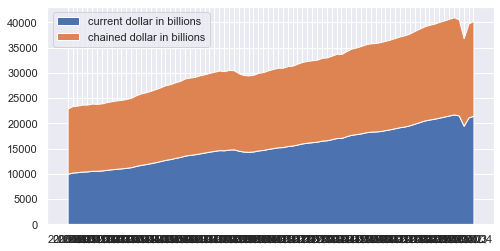

In [33]:
# Draw stackplot of GDP of both current and chained dollars 
# by quarter. Both curves has similar shapes.
fig = plt.figure(figsize=(8,4))

# set seaborn style
sns.set_theme()

# Quarters are in X axis and current and chained dollar (in billions) on Y axis
x = list(df_gdp['quarters'])
y = [list(df_gdp['current_dollar']), list(df_gdp['chained_dollar'])]
 
# Plot
plt.stackplot(x,y, labels=['current dollar in billions', 'chained dollar in billions'])
plt.legend(loc='upper left')
plt.show()

In [34]:
# Two new columns were created to detect recession occurrence.
# If the current quarter is lower than the previous, 'status' column 
# receives 1, otherwise 0. A recession is detected when two consecutive 
# '1 ' is found on the 'status' column. In that case, the 'recession_alert' 
# receives value 1.

import warnings
warnings.filterwarnings('ignore')

df_gdp['status'] = ''
df_gdp['recession_alert'] = ''

# 'status' column
for index in range(df_gdp.shape[0]):
    if index>0:
        previous = df_gdp['chained_dollar'].iloc[index-1]
        current = df_gdp['chained_dollar'].iloc[index]
        if current>previous:
            df_gdp['status'].iloc[index] = 0   # if current quarter is higher than the previous
        else:
            df_gdp['status'].iloc[index] = 1    # if current quarter is lower than the previous

# 'recession_alert' column
for index in range(df_gdp.shape[0]):
    if index>1:
        previous_2 = df_gdp['status'].iloc[index-2]
        previous_1 = df_gdp['status'].iloc[index-1]
        if (previous_1==1) and (previous_2==1):
            df_gdp['recession_alert'].iloc[index] = 1 # if there are two consecultive '1's
        else:
            df_gdp['recession_alert'].iloc[index] = 0 # if there are NOT two consecultive '1'

In [35]:
# printing the modified dataset
df_gdp

,quarters,current_dollar,chained_dollar,year,quarter,status,recession_alert
0,2000Q1,10002.9,12924.2,2000,Q1,,
1,2000Q2,10247.7,13160.8,2000,Q2,0,
2,2000Q3,10319.8,13178.4,2000,Q3,0,0
3,2000Q4,10439.0,13260.5,2000,Q4,0,0
4,2001Q1,10472.9,13222.7,2001,Q1,1,0
...,...,...,...,...,...,...,...
79,2019Q4,21747.4,19254.0,2019,Q4,0,0
80,2020Q1,21561.1,19010.8,2020,Q1,1,0
81,2020Q2,19520.1,17302.5,2020,Q2,1,0
82,2020Q3,21170.3,18596.5,2020,Q3,0,1


In [36]:
# Detects the period where occured recession
df_gdp[df_gdp['recession_alert'] == 1]

,quarters,current_dollar,chained_dollar,year,quarter,status,recession_alert
36,2009Q1,14394.5,15155.9,2009,Q1,1,1
37,2009Q2,14352.9,15134.1,2009,Q2,1,1
38,2009Q3,14420.3,15189.2,2009,Q3,0,1
82,2020Q3,21170.3,18596.5,2020,Q3,0,1


In [37]:
# Create a subset with quarters from
df_recession = df_gdp.iloc[30:42]
df_recession

,quarters,current_dollar,chained_dollar,year,quarter,status,recession_alert
30,2007Q3,14535.0,15666.7,2007,Q3,0,0
31,2007Q4,14681.5,15762.0,2007,Q4,0,0
32,2008Q1,14651.0,15671.4,2008,Q1,1,0
33,2008Q2,14805.6,15752.3,2008,Q2,0,0
34,2008Q3,14835.2,15667.0,2008,Q3,1,0
35,2008Q4,14559.5,15328.0,2008,Q4,1,0
36,2009Q1,14394.5,15155.9,2009,Q1,1,1
37,2009Q2,14352.9,15134.1,2009,Q2,1,1
38,2009Q3,14420.3,15189.2,2009,Q3,0,1
39,2009Q4,14628.0,15356.1,2009,Q4,0,0


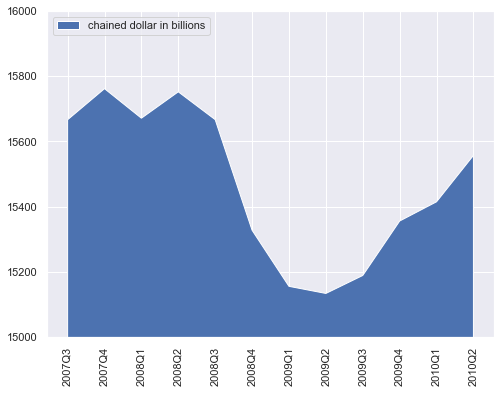

In [38]:
# It's possible to see the recession period by plotting 'df_recession'.
# The graph shows a drop in GDP. It was used only chained dollars
fig = plt.figure(figsize=(8,6))

# set seaborn style
sns.set_theme()
 
# Quarters are in X axis and chained dollars (in billions) on Y axis
x = list(df_recession['quarters'])
y = [list(df_recession['chained_dollar'])]
 
# Plot
plt.stackplot(x,y, labels=['chained dollar in billions'])
plt.xticks(rotation='90')
plt.ylim(15000, 16000)
plt.legend(loc='upper left')
plt.show()

As the recession period is identified, a home value prices subset(from 'df_by_city' df) 
from the recession period need be created.

Also, home price values are monthly described. Thus, it needs manipulation to set the values in
quarters. 

In [193]:
# Create a subset (df_cities_recession) of home sale prices from 2007 to 2010
df_cities_recession = df_by_city.loc[(df_by_city['year']>= 2007) & (df_by_city['year']<= 2010)]
df_cities_recession = df_cities_recession.reset_index()
df_cities_recession = df_cities_recession.drop(columns=['index']) 
df_cities_recession

,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,Dallas_TX,...,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA,date,year,month
0,514159,652104,133166,292975,129107,154505,254362,329659,559170,147452,...,36838,87785,76330,67120,120376,67140,70035,2007-01-31,2007,01
1,514639,650321,133227,294169,129610,155406,254701,329230,556221,147228,...,36838,87785,76315,67127,121073,67140,70035,2007-02-28,2007,02
2,517821,648030,133101,293600,129856,156159,255090,327897,550334,147067,...,36838,87785,76297,67139,121985,67140,70035,2007-03-31,2007,03
3,519488,648101,133172,293299,130089,156151,255885,324669,544471,147265,...,36837,87785,76274,67154,123676,67140,70035,2007-04-30,2007,04
4,521744,646471,133427,291449,130868,156571,255421,321124,537733,147677,...,36837,87785,76244,67172,125345,67140,70035,2007-05-31,2007,05
5,519368,644582,133835,291176,131801,156821,253838,318038,534375,147869,...,36837,87784,76206,67193,127225,67140,70035,2007-06-30,2007,06
6,518396,640830,133910,289521,132782,157254,251810,314937,530151,147984,...,36836,87784,76150,67218,129121,67140,70034,2007-07-31,2007,07
7,517083,636023,134231,289233,133670,157198,249985,311824,527940,148319,...,36836,87783,76062,67246,131037,67140,70034,2007-08-31,2007,08
8,516381,629975,134507,287909,134326,156725,247952,307965,524336,148681,...,36836,87782,75915,67284,132107,67139,70033,2007-09-30,2007,09
9,517250,621816,134768,287719,134869,156613,245243,303953,520404,148628,...,36835,87781,75734,67331,132954,67139,70033,2007-10-31,2007,10


In [194]:
# Drop the date column as it won't be needed for the next steps
df_cities_recession = df_cities_recession.drop(['date'], axis=1)
df_cities_recession.shape

(48, 27332)

In [195]:
# For iteration purposes, a list with city names will be created
city_names = list(df_cities_recession.iloc[:,0:-2])
city_names[:4]

['New York_NY', 'Los Angeles_CA', 'Houston_TX', 'Chicago_IL']

In [196]:
# Create a dataframe with quarters from 2007 to 2010 using the mean prices of houses

df_list = []
# for each city
for city in tqdm(city_names):
    data_list = []
    quarter_list = []
    count = 0
    # for each row
    for index in range(df_cities_recession.shape[0]+1): 
        if count == 4: # everytime and quarter is calculated, count is restarted
            count = 0
        if (index > 0) & (index%3 == 0): # only processes indexes like 3, 6, 9, etc.
            count += 1 # only goes from 1 to 4 values
            
            mean = round(df_cities_recession[city].iloc[index-3:index].mean(), 2) # Get the mean for a 3 month period
            data_list.append(mean) # adds the mean to a list
            
            year = df_cities_recession['year'].iloc[index-1]
            quarter = '{}Q{}'.format(year, count) #  create the string (ex: 2007Q1)
            quarter_list.append(quarter) # ad the quarter into a list that will be used as the first column

    df_list.append(data_list) # ads the list that contain the quarter value (mean of home value prices)

# create a dataframe for the first column
quarter_df = pd.DataFrame(quarter_list[:16], columns=['quarters'])

100%|██████████| 27330/27330 [26:37<00:00, 17.11it/s]  


In [197]:
# Create dataframes with quarter values for each city
dfs = [] 
for i in tqdm(range(len(city_names))):
    dicts = {city_names[i]: df_list[i]}
    df_item = pd.DataFrame(dicts, columns=[city_names[i]]) # creates dataframes
    dfs.append(df_item) # add the dataframes into a list

100%|██████████| 27330/27330 [00:54<00:00, 499.61it/s]


In [198]:
# Concatenate the dataframes in the 'dfs' list of the cell above
concat = pd.concat(dfs, axis=1)

# Concatenate the dataframe with quarter names with the 'concat' dataframe 
cities_quarters_df = pd.concat([quarter_df, concat], axis=1)

In [199]:
# 'cities_quarters_df' contains the quarters for all cities
print(cities_quarters_df.shape)
cities_quarters_df.head(5)

(16, 27331)


,quarters,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
0,2007Q1,515539.67,650151.67,133164.67,293581.33,129524.33,155356.67,254717.67,328928.67,555241.67,...,47364.00,94369.67,85543.00,36838.00,87785.00,76314.00,67128.67,121144.67,67140.00,70035.00
1,2007Q2,520200.00,646384.67,133478.00,291974.67,130919.33,156514.33,255048.00,321277.00,538859.67,...,49030.67,95791.33,85542.67,36837.00,87784.67,76241.33,67173.00,125415.33,67140.00,70035.00
2,2007Q3,517286.67,635609.33,134216.00,288887.67,133592.67,157059.00,249915.67,311575.33,527475.67,...,48234.67,96157.67,85541.67,36836.00,87783.00,76042.33,67249.33,130755.00,67139.67,70033.67
3,2007Q4,518115.33,614417.33,134960.00,286776.67,135115.67,156955.00,241024.00,296888.33,514466.67,...,48785.00,96341.33,85540.00,36835.00,87778.67,76049.00,67431.67,133343.67,67139.00,70031.33
4,2008Q1,517106.00,591086.33,134304.00,282912.33,135052.67,157455.67,227221.67,270982.00,493203.00,...,49311.67,96158.67,85535.00,36834.33,87769.33,77495.67,67389.33,133947.67,67137.67,70025.33


This piece of code creates a cities_quarters_df backup point

In [200]:
# cities_quarters_df backup
# cities_quarters_df.to_csv('cities_quarters.csv', index=False)

### III. University towns

Step 1 - Load the dataset

Dataset is from the Wikipedia page on college towns. It contains list of university towns in the United States which has been copy and pasted into the file university_towns.txt.

In [201]:
df_towns = pd.read_csv("https://raw.githubusercontent.com/madserrano/advance_py/main/university_towns.txt", 
                       encoding = 'utf-16', sep = " ", index_col=0, header=None, names=["town"])

In [202]:
df_towns.shape

(567, 0)

In [203]:
df_towns.head()

""
town
Alabama[edit]
Auburn
Florence
Jacksonville
Livingston


In [204]:
# reset index
df_towns.reset_index(inplace=True)

In [205]:
# Dictionary with US states abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [206]:
# Takes item in column town. If it's a stata it is in  a state[].
# split the text, take the state name and returns its abbreviation
def check(text):
    text = text.split('[')
    if len(text) > 1:
        state = us_state_abbrev[text[0]]
    elif len(text)==1:
        state = ''
    else:
        state = ''
    return state

In [207]:
# Apply check function into all rows
df_towns['state'] = df_towns['town'].apply(lambda x: check(x))

In [208]:
# Create a column with the sity_state format
df_towns['city_state'] = ''

for i in range(df_towns.shape[0]):
    j = i+1
    if j <= df_towns.shape[0]:
        state = df_towns['state'].iloc[i]
        city = df_towns['town'].iloc[i]
        
        print(state, city, df_towns['town'].iloc[j])
        
        if df_towns['state'].iloc[j] == '':
            df_towns['state'].iloc[j] = state

        string = '{}_{}'.format(city, state)
        df_towns['city_state'].iloc[i] = string

AL Alabama[edit] Auburn
AL Auburn Florence
AL Florence Jacksonville
AL Jacksonville Livingston
AL Livingston Montevallo
AL Montevallo Troy
AL Troy Tuscaloosa
AL Tuscaloosa Tuskegee
AL Tuskegee Alaska[edit]
AK Alaska[edit] Fairbanks
AK Fairbanks Arizona[edit]
AZ Arizona[edit] Flagstaff
AZ Flagstaff Tempe
AZ Tempe Tucson
AZ Tucson Arkansas[edit]
AR Arkansas[edit] Arkadelphia
AR Arkadelphia Conway
AR Conway Fayetteville
AR Fayetteville Jonesboro
AR Jonesboro Magnolia
AR Magnolia Monticello
AR Monticello Russellville
AR Russellville Searcy
AR Searcy California[edit]
CA California[edit] Angwin
CA Angwin Arcata
CA Arcata Berkeley
CA Berkeley Chico
CA Chico Claremont
CA Claremont Cotati
CA Cotati Davis
CA Davis Irvine
CA Irvine Isla
CA Isla University
CA University Merced
CA Merced Orange
CA Orange Palo
CA Palo Pomona
CA Pomona Redlands
CA Redlands Riverside
CA Riverside Sacramento
CA Sacramento University
CA University San
CA San San
CA San Santa
CA Santa Santa
CA Santa Turlock
CA Turlock We

PA Collegeville Cresson
PA Cresson East
PA East Edinboro
PA Edinboro Erie
PA Erie Gettysburg
PA Gettysburg Greensburg
PA Greensburg Grove
PA Grove Huntingdon
PA Huntingdon Indiana
PA Indiana Johnstown
PA Johnstown Kutztown
PA Kutztown Lancaster
PA Lancaster Lewisburg
PA Lewisburg Lock
PA Lock Loretto
PA Loretto Mansfield
PA Mansfield Meadville
PA Meadville Mont
PA Mont Millersville
PA Millersville New
PA New North
PA North University
PA University Oakland,
PA Oakland, Reading
PA Reading Selinsgrove
PA Selinsgrove Shippensburg
PA Shippensburg Slippery
PA Slippery State
PA State Villanova
PA Villanova Waynesburg
PA Waynesburg West
PA West Wilkes-Barre
PA Wilkes-Barre Williamsport
PA Williamsport Rhode
PA Rhode Kingston
PA Kingston Providence
PA Providence South
PA South Central
PA Central Charleston
PA Charleston Clemson
PA Clemson Clinton
PA Clinton Columbia
PA Columbia Due
PA Due Florence
PA Florence Greenwood
PA Greenwood Orangeburg
PA Orangeburg Rock
PA Rock Spartanburg
PA Spartanbur

IndexError: single positional indexer is out-of-bounds

In [157]:
df_towns.head()

,town,state,city_state
0,Alabama[edit],AL,Alabama[edit]_AL
1,Auburn,AL,Auburn_AL
2,Florence,AL,Florence_AL
3,Jacksonville,AL,Jacksonville_AL
4,Livingston,AL,Livingston_AL


In [209]:
# create a list with city town names
city_town_names_list = list(df_towns['city_state'].values)
city_town_names_list[10:15]

['Fairbanks_AK', 'Arizona[edit]_AZ', 'Flagstaff_AZ', 'Tempe_AZ', 'Tucson_AZ']

### Visualization example

According to http://www.collegeranker.com/features/best-college-towns, St. Augustine (Florida), Lawrence (Kansas), Fort Collins(Colorado), are the top-3 university towns. For our visualization sample we will also include Malibu(California) and Oxford (Mississippi)

In [210]:
towns_to_compare = ['Fort Collins_CO', 'Lawrence_KS', 'Oxford_MS', 'Malibu_CA', 'Saint Augustine Beach_FL']

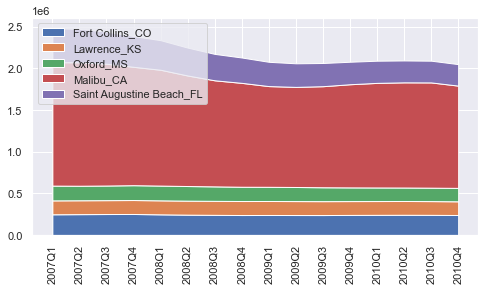

In [211]:
# # This graph shows quarter home value prices of the city towns in 'towns_to_compare' list
# This graph shows that cities Fort Collins, Lawrence and Oxfor were not affected by recession, 
# where as Malibu and Saint Augustine Beach quarters dropped during recession
fig = plt.figure(figsize=(8,4))

# set seaborn style
sns.set_theme()
 
# Quarters description are in X axis quarter values for each city are on Y axis
x = list(cities_quarters_df['quarters'])
y = [list(cities_quarters_df[towns_to_compare[0]]), list(cities_quarters_df[towns_to_compare[1]]), 
    list(cities_quarters_df[towns_to_compare[2]]), list(cities_quarters_df[towns_to_compare[3]]),
    list(cities_quarters_df[towns_to_compare[4]])]
 
# Plot
plt.stackplot(x,y, labels=[towns_to_compare[0], towns_to_compare[1], towns_to_compare[2], 
                           towns_to_compare[3], towns_to_compare[4]])
plt.xticks(rotation='90')
plt.legend(loc='upper left')
plt.show()

# IV - T-test

A recession is defined as starting with two consecutive quarters of GDP decline,
and ending with two consecutive quarters of GDP growth.

A recession bottom is the quarter within a recession which had the lowest GDP.

Run a t-test to compare the ratio of the mean price of houses in university towns 
the quarter before the recession starts compared to the recession bottom. 
(price_ratio=quarter_before_recession/recession_bottom)

From df_recession, we can notice that the recession started in 2008Q3,
ended in 2009Q4 and that recession bottom was in 2009Q2.

Thus, we will take a subset of cities quarters (2008Q3 and 2009Q2) dataset (cities_quarters_df) with those values to calculate the price ratio.

In [212]:
# Print GDP dataset for the recession period (2008Q3 - 2009Q4)
df_recession

,quarters,current_dollar,chained_dollar,year,quarter,status,recession_alert
30,2007Q3,14535.0,15666.7,2007,Q3,0,0
31,2007Q4,14681.5,15762.0,2007,Q4,0,0
32,2008Q1,14651.0,15671.4,2008,Q1,1,0
33,2008Q2,14805.6,15752.3,2008,Q2,0,0
34,2008Q3,14835.2,15667.0,2008,Q3,1,0
35,2008Q4,14559.5,15328.0,2008,Q4,1,0
36,2009Q1,14394.5,15155.9,2009,Q1,1,1
37,2009Q2,14352.9,15134.1,2009,Q2,1,1
38,2009Q3,14420.3,15189.2,2009,Q3,0,1
39,2009Q4,14628.0,15356.1,2009,Q4,0,0


In [213]:
# Print quarters of home value price dataset near the recession period (2007Q1 - 2010Q4)
cities_quarters_df

,quarters,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
0,2007Q1,515539.67,650151.67,133164.67,293581.33,129524.33,155356.67,254717.67,328928.67,555241.67,...,47364.00,94369.67,85543.00,36838.00,87785.00,76314.00,67128.67,121144.67,67140.00,70035.00
1,2007Q2,520200.00,646384.67,133478.00,291974.67,130919.33,156514.33,255048.00,321277.00,538859.67,...,49030.67,95791.33,85542.67,36837.00,87784.67,76241.33,67173.00,125415.33,67140.00,70035.00
2,2007Q3,517286.67,635609.33,134216.00,288887.67,133592.67,157059.00,249915.67,311575.33,527475.67,...,48234.67,96157.67,85541.67,36836.00,87783.00,76042.33,67249.33,130755.00,67139.67,70033.67
3,2007Q4,518115.33,614417.33,134960.00,286776.67,135115.67,156955.00,241024.00,296888.33,514466.67,...,48785.00,96341.33,85540.00,36835.00,87778.67,76049.00,67431.67,133343.67,67139.00,70031.33
4,2008Q1,517106.00,591086.33,134304.00,282912.33,135052.67,157455.67,227221.67,270982.00,493203.00,...,49311.67,96158.67,85535.00,36834.33,87769.33,77495.67,67389.33,133947.67,67137.67,70025.33
5,2008Q2,508060.33,549553.33,132495.67,275689.67,134731.33,156075.33,210472.00,248290.67,472455.33,...,48165.00,95350.00,83992.67,36834.00,85246.67,79344.67,66177.67,133277.67,69056.33,68519.00
6,2008Q3,497311.67,510849.33,130583.00,267684.00,133287.33,153039.67,194855.00,227652.67,450700.33,...,47550.33,94084.00,82551.33,36834.00,82365.00,81225.00,65250.67,130777.00,70459.33,68212.67
7,2008Q4,486799.33,480632.33,128629.33,256554.00,131531.00,151499.67,179928.00,206196.33,428033.00,...,47098.00,92955.33,82985.33,36834.67,82033.67,81232.67,64738.67,130321.67,70527.33,68187.67
8,2009Q1,473024.00,453120.00,127112.33,242629.67,130207.67,148285.67,167186.67,190252.00,414389.00,...,46555.00,91483.33,85969.33,36835.67,83171.67,78146.33,64856.33,129968.33,70526.67,68175.00
9,2009Q2,461307.33,441122.33,126925.33,232649.67,129005.00,147063.00,155113.67,173950.00,405587.00,...,45930.00,89724.67,86235.67,36836.67,81218.00,75855.33,64899.00,129636.67,70523.33,68166.00


In [214]:
# Take a subset of cities quarters dataset (cities_quarters_df) 
# containing quarters 2008Q3 and 2009Q2 to calculate the price ratio
subset = cities_quarters_df.iloc[[5, 11],:]
subset

,quarters,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
5,2008Q2,508060.33,549553.33,132495.67,275689.67,134731.33,156075.33,210472.00,248290.67,472455.33,...,48165.00,95350.00,83992.67,36834.0,85246.67,79344.67,66177.67,133277.67,69056.33,68519.00
11,2009Q4,444569.00,439737.67,127421.33,219838.00,127185.33,147867.67,140073.33,150515.00,415185.67,...,45497.33,86168.67,86234.00,36837.0,81217.67,73720.33,65565.00,125141.00,70483.33,68158.33


In [215]:
# to facilitate the process we will take the transpose matrix of 'subset' 
# Formula: price_ratio = quarter_before_recession(subset[6])/recession_bottom(subset[11])
subset_T = subset.T
subset_T.head()

,5,11
quarters,2008Q2,2009Q4
New York_NY,508060,444569
Los Angeles_CA,549553,439738
Houston_TX,132496,127421
Chicago_IL,275690,219838


In [216]:
# Create a function to calculate the price ratio
import numpy as np
def price_ratio(x, y):
    if (type(x)==float) & (type(y)==float):
        price_ratio = x/y
    else:
        price_ratio = np.nan
    
    return price_ratio

In [218]:
# create a new column 'price_ratio' and calculate the price ration
subset_T['price_ratio'] = ''
for index in tqdm(range(subset_T.shape[0])):
    x = subset_T[5].iloc[index]
    y = subset_T[11].iloc[index]
    subset_T['price_ratio'].iloc[index] = price_ratio(x, y)

100%|██████████| 27331/27331 [00:13<00:00, 2089.82it/s]


In [219]:
# print first rows
subset_T.head()

,5,11,price_ratio
quarters,2008Q2,2009Q4,NaN
New York_NY,508060,444569,1.14282
Los Angeles_CA,549553,439738,1.24973
Houston_TX,132496,127421,1.03982
Chicago_IL,275690,219838,1.25406


In [220]:
# converts the dataset back to firt format
subset = subset_T.T
subset

,quarters,New York_NY,Los Angeles_CA,Houston_TX,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
5,2008Q2,508060,549553,132496,275690,134731,156075,210472,248291,472455,...,48165,95350,83992.7,36834,85246.7,79344.7,66177.7,133278,69056.3,68519
11,2009Q4,444569,439738,127421,219838,127185,147868,140073,150515,415186,...,45497.3,86168.7,86234,36837,81217.7,73720.3,65565,125141,70483.3,68158.3
price_ratio,NaN,1.14282,1.24973,1.03982,1.25406,1.05933,1.05551,1.50258,1.64961,1.13794,...,1.05863,1.10655,0.974009,0.999919,1.04961,1.07629,1.00934,1.06502,0.979754,1.00529


In [221]:
# Checking for nul values
subset.isnull().sum()

quarters          1
New York_NY       0
Los Angeles_CA    0
Houston_TX        0
Chicago_IL        0
                 ..
Winton_MN         0
Eastabuchie_MS    0
Dean_TX           0
Pulaski_GA        0
New Paris_PA      0
Length: 27331, dtype: int64

In [222]:
# 'city_town_names_list' contain a list o city town names
# we are going to check if those cities are in the 'subset' dataframe

# create a list with 'subset' columns names
subset_cities = list(subset.columns.values)
subset_cities[5:8]

['San Antonio_TX', 'Philadelphia_PA', 'Phoenix_AZ']

In [252]:
# check if city_town_names_list has elements in 'subset_cities' and
# in positive case save it into towns_list list. Otherwise, save it
# into no_univ_towns_list list
towns_list = []
no_univ_towns_list = []
for city in city_town_names_list:
    if city in subset_cities:
        towns_list.append(city)

for city in subset_cities:
    if city not in towns_list:
        no_univ_towns_list.append(city)

In [254]:
no_univ_towns_list.remove('quarters')

In [256]:
no_univ_towns_list[:5]

['New York_NY',
 'Los Angeles_CA',
 'Chicago_IL',
 'San Antonio_TX',
 'Philadelphia_PA']

In [241]:
# Only 312 university towns from .txt file are in subset
print('Number of cities in university towns.txt files: ', len(city_town_names_list))
print('Number of cities in university towns.txt files that are in the subset dataset: ', len(towns_list))

Number of cities in university towns.txt files:  567
Number of cities in university towns.txt files that are in the subset dataset:  312


In [257]:
# Creating a t_test_df subset with non university towns
t_test_no_univ = subset[no_univ_towns_list]
t_test_no_univ.head(3)

,New York_NY,Los Angeles_CA,Chicago_IL,San Antonio_TX,Philadelphia_PA,Phoenix_AZ,Las Vegas_NV,San Diego_CA,San Jose_CA,Jacksonville_FL,...,Worthville_PA,Middleton_GA,Columbus Township_PA,Pursglove_WV,Tome_NM,Winton_MN,Eastabuchie_MS,Dean_TX,Pulaski_GA,New Paris_PA
5,508060,549553,275690,134731,156075,210472,248291,472455,567209,179694,...,48165,95350,83992.7,36834,85246.7,79344.7,66177.7,133278,69056.3,68519
11,444569,439738,219838,127185,147868,140073,150515,415186,523015,145098,...,45497.3,86168.7,86234,36837,81217.7,73720.3,65565,125141,70483.3,68158.3
price_ratio,1.14282,1.24973,1.25406,1.05933,1.05551,1.50258,1.64961,1.13794,1.0845,1.23843,...,1.05863,1.10655,0.974009,0.999919,1.04961,1.07629,1.00934,1.06502,0.979754,1.00529


In [225]:
# Creating a t_test_df subset with only university towns
t_test_df = subset[towns_list]
t_test_df

,Auburn_AL,Florence_AL,Jacksonville_AL,Livingston_AL,Montevallo_AL,Troy_AL,Tuscaloosa_AL,Tuskegee_AL,Fairbanks_AK,Flagstaff_AZ,...,Ellensburg_WA,Pullman_WA,Appleton_WI,Madison_WI,Menomonie_WI,Milwaukee_WI,Oshkosh_WI,Platteville_WI,Waukesha_WI,Whitewater_WI
5,226447,118945,120869,96227.7,122739,123280,155473,36500.7,215782,342387,...,276837,228719,138214,222740,154488,121675,132183,144633,214099,207811
11,212160,113530,115419,89474,115819,112737,149927,36044,210522,293365,...,241033,199217,131685,215866,144974,111772,126203,129107,200629,189037
price_ratio,1.06734,1.0477,1.04721,1.07548,1.05975,1.09352,1.03699,1.01267,1.02499,1.1671,...,1.14855,1.14809,1.04958,1.03184,1.06562,1.08859,1.04738,1.12026,1.06714,1.09931


In [15]:
# printing the mean of price_ratio for non university town and 
# for university towns
print('Non university towns price_ratio mean: ', t_test_no_univ.loc['price_ratio'].mean())
print('University towns price_ratio mean: ', t_test_df.loc['price_ratio'].mean())

Non university towns price_ratio mean:  1.0749050784656105
University towns price_ratio mean:  1.0794007474073524


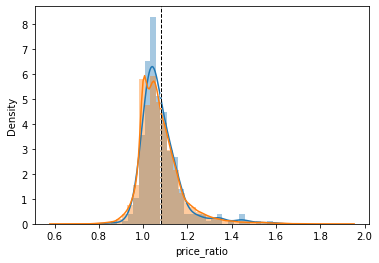

In [22]:
#  Plots the distribution for both university town and non univevrsity towns
import warnings
warnings.filterwarnings('ignore')

ut = t_test_df.loc['price_ratio']
non_ut = t_test_no_univ.loc['price_ratio']
plt.figure()
ax1 = sns.distplot(ut)
ax2 = sns.distplot(non_ut)
plt.axvline(np.mean(ut), color='black', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(non_ut), color='white', linestyle='dashed', linewidth=1)

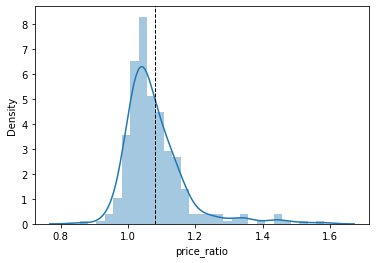

In [24]:
# Print distribution separetely
ut = t_test_df.loc['price_ratio']
ax1 = sns.distplot(ut)
plt.axvline(np.mean(ut), color='black', linestyle='dashed', linewidth=1)

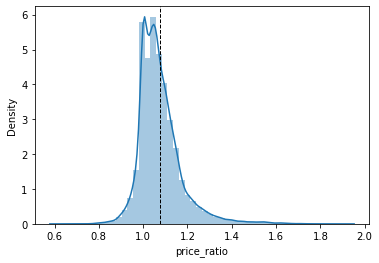

In [26]:
non_ut = t_test_no_univ.loc['price_ratio']
ax2 = sns.distplot(non_ut)
plt.axvline(np.mean(non_ut), color='black', linestyle='dashed', linewidth=1)

Hipothesis: University towns have their mean housing prices less effected by recessions
The lower the price ratio the less affected by recession the city is.

Thus, the alternate hipothesis (Ha) states that the mean of the price ratio of university towns (ut_price_ration) is lower than the mean of the price ratio of NON-university towns (non_ut_price_ratio). 

The null hipothesis (Ho) is that the mean of the price ratio of university towns (ut_price_ration) is equal to or higher than the mean of the price ratio of NON-university towns (non_ut_price_ratio).

Thus, we have:
- Ha: mean of ut_price_ratio < mean non_ut_price_ratio
- Ho: mean of ut_price_ratio >= mean non_ut_price_ratio 

- Ha: mean of ut_price_ratio < 1.0794007474073524
- Ho: mean of ut_price_ratio >= 1.0794007474073524 



By calculating the 'p' value, using the price_ratio from both non university town and university towns, we can either reject the null hipothesis (same as saying that the home price values of university towns indeed is less affected by recession) or we can accept the null hipothesis (same as saying that the home price values of university towns is as affected by recession as non university towns).

Taking the significance level(alpha) as 0,05:
- if p > alpha, then we accepted the null hipothesis.
- if p < alpha, then we reject the null hipothesis.

Here is a different example to understand 'p' value. If we run two identical set of values and compare them, we can predict that 'p' values will be exactly 1. This result means that there is no difference between the values provided.

In [32]:
# Demonstrate 'p' value for identical values (similar mean, shape, etc.)
from scipy.stats import ttest_ind
import numpy as np

ut = t_test_df.loc['price_ratio'].values # university cities values

# loading the university cities values TWICE in the ttest_ind from scipy, we can measure p
stat, p = ttest_ind(ut, ut)

# Print p value.
print('p: ', p)

p:  1.0


We will run the two different datasets and se if 'p' is higher or lower than alpha

In [34]:
non_ut = t_test_no_univ.loc['price_ratio'].values # non university cities values

# dealing with possible nan values in non university cities 
non_ut_sample = []
for i in non_ut:
    if i is not np.nan:
        non_ut_sample.append(i)
non_ut = np.array(non_ut_sample)

ut = t_test_df.loc['price_ratio'].values # university cities values

# loading the two different data into ttest_ind from scipy, we measure p
stat, p = ttest_ind(ut, non_ut)

In [35]:
# Print p value.
print('p: ', p)

p:  0.42093731558754854


# Result

#### At the level of 5%, there is no evidence that the university towns have their mean housing prices less affected by recessions.